In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
#upload spotify data set to make the cohort of songs
songs=pd.read_csv("rolling_stones_spotify.csv")

In [ ]:
#check the first 5 row of data
songs.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
#for data cleaning select useful colums. fetching the all coloum from the dataset
songs.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [ ]:
#drop the Unnamed,name, album, tracknumber , id. uri column from data set
songs=songs[['release_date', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'
       ]]

In [ ]:
# check number of column and row in the data set
songs.shape

(1610, 12)

In [ ]:
#find the null value
pd.isnull(songs).sum()

release_date        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

We dont have any null value in the data set

In [ ]:
#check the data type of all column
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      1610 non-null   object 
 1   acousticness      1610 non-null   float64
 2   danceability      1610 non-null   float64
 3   energy            1610 non-null   float64
 4   instrumentalness  1610 non-null   float64
 5   liveness          1610 non-null   float64
 6   loudness          1610 non-null   float64
 7   speechiness       1610 non-null   float64
 8   tempo             1610 non-null   float64
 9   valence           1610 non-null   float64
 10  popularity        1610 non-null   int64  
 11  duration_ms       1610 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 151.1+ KB


In [ ]:
#find the least popular songs in spotify list
# sorting by popularity
leastPopular = songs.sort_values('popularity', ascending = True).head(10)
leastPopular

,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1591,1964-05-30,0.014100,0.475,0.731,0.103000,0.161,-8.731,0.0554,87.559,0.903,0,159733
587,2012-07-09,0.075400,0.484,0.884,0.012600,0.569,-5.162,0.0987,123.344,0.603,0,660320
1338,1967-01-20,0.568000,0.497,0.751,0.000227,0.217,-8.733,0.0444,112.025,0.734,0,197306
1394,1966-12-10,0.000754,0.515,0.948,0.890000,0.814,-8.779,0.0997,122.533,0.542,0,123666
1396,1966-12-10,0.003590,0.332,0.989,0.000013,0.221,-7.366,0.1490,173.877,0.301,0,116933
1397,1966-12-10,0.050800,0.339,0.936,0.000000,0.558,-7.042,0.0638,103.362,0.466,0,187800
739,1991-04-02,0.019500,0.296,0.735,0.725000,0.692,-22.301,0.0469,107.788,0.200,0,27693
1589,1964-05-30,0.136000,0.628,0.368,0.538000,0.170,-10.734,0.1080,87.178,0.470,0,129826
1400,1966-12-10,0.013600,0.414,0.942,0.132000,0.940,-7.757,0.0629,119.475,0.530,0,146493
1401,1966-12-10,0.025600,0.427,0.915,0.017900,0.890,-7.401,0.0446,109.260,0.476,0,139240


In [ ]:
songs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304
valence,1610.0,0.582165,0.231253,0.000000,0.404250,0.58300,0.77800,0.974
popularity,1610.0,20.788199,12.426859,0.000000,13.000000,20.00000,27.00000,80.000


In [ ]:
#find the most popular songs in spotify list
#sorting by popularity
MostPopular = songs.sort_values('popularity', ascending = False).head(10)
MostPopular

,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1403,1966-04-15,0.0493,0.464,0.795,0.002440,0.3990,-9.267,0.0926,158.691,0.612,80,202266
1248,1969-12-05,0.4470,0.634,0.630,0.039000,0.1700,-8.277,0.0310,118.628,0.489,76,270773
1472,1965-07-30,0.0383,0.723,0.863,0.031700,0.1280,-7.890,0.0338,136.302,0.931,76,222813
862,1981-08-24,0.0436,0.631,0.932,0.137000,0.0918,-4.142,0.0354,122.429,0.971,76,213066
1257,1968-12-06,0.5180,0.702,0.668,0.000000,0.0588,-9.237,0.2140,116.063,0.561,73,378146
901,1978-06-09,0.3900,0.783,0.878,0.000778,0.0426,-3.864,0.0308,100.626,0.885,72,265173
1023,1973-08-31,0.6700,0.429,0.554,0.000152,0.1050,-6.128,0.0291,136.302,0.407,71,272000
893,1978-06-09,0.4430,0.795,0.710,0.021500,0.3440,-4.746,0.0392,109.689,0.845,69,288666
1122,1971-04-23,0.6870,0.432,0.389,0.010700,0.0788,-6.517,0.0255,139.506,0.158,69,341773
1256,1969-12-05,0.6400,0.320,0.620,0.000064,0.2530,-9.686,0.0594,86.327,0.472,67,448720


In [ ]:
# Convert the ms into second from Duration column
songs["duration"]= songs["duration_ms"].apply(lambda x: round(x/1000))
songs.drop("duration_ms", inplace=True, axis=1)

<ipython-input-15-701b27c889aa>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


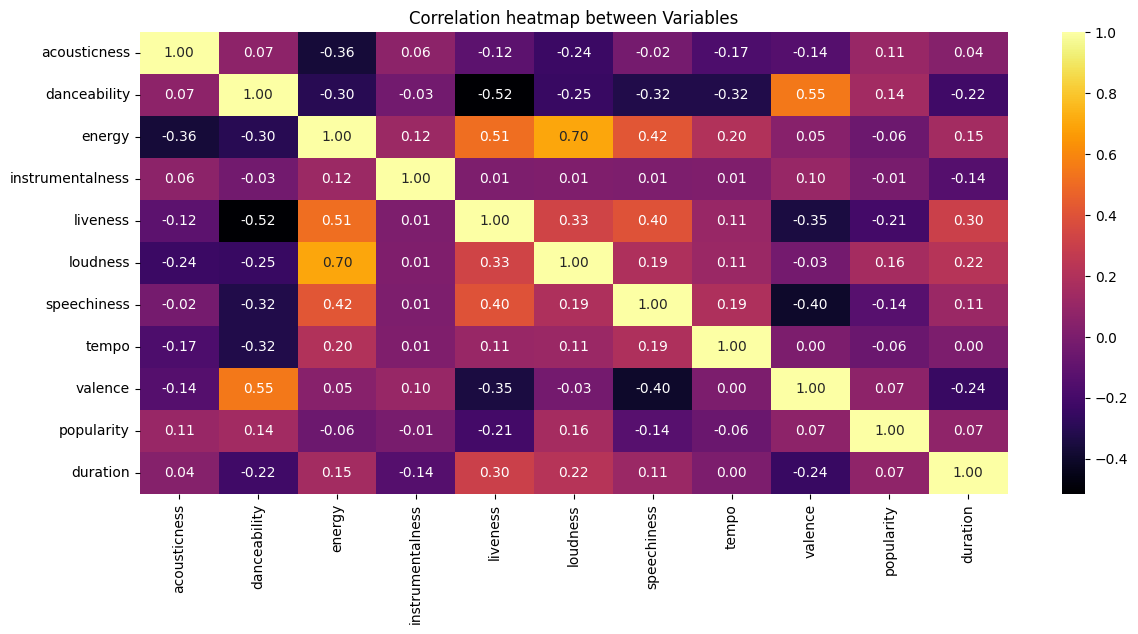

In [ ]:
# corelation map between all variables
df = pd.DataFrame(songs)
# Calculate correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(14,6))
# Create correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation heatmap between Variables')
plt.show()

From above map we can say there is a positive corelation betwen valence and danceability and loudness and energy

[Text(0.5, 1.0, 'Loudness vs energy corelations')]

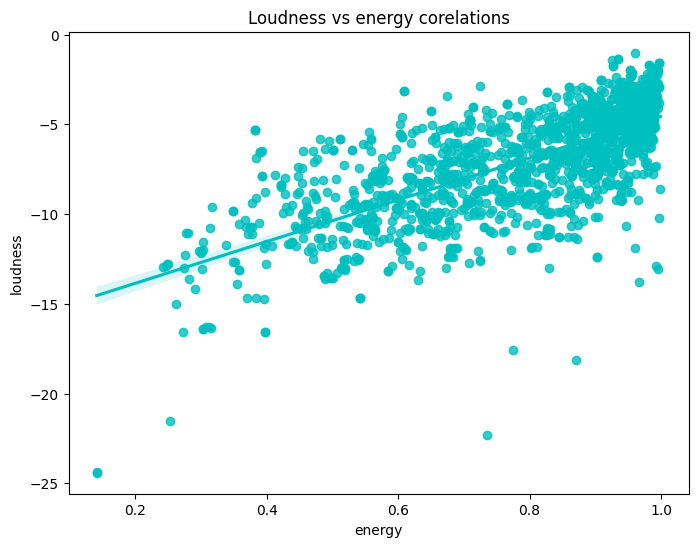

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data = songs, y ="loudness" ,x= "energy", color= "c").set(title ="Loudness vs energy corelations")

from above graph we can say that if loudness increase energy is also increase

[Text(0.5, 1.0, 'Valence vs Danceability corelations')]

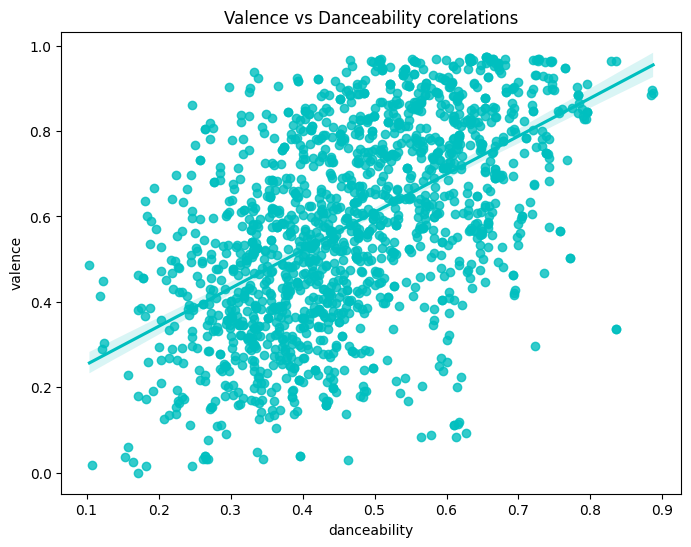

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data = songs, y ="valence" ,x= "danceability", color= "c").set(title ="Valence vs Danceability corelations")

From the above graph, we can say that if valence increases, danceability also increases.

[Text(0.5, 1.0, 'Popularity vs Acousticness corelations')]

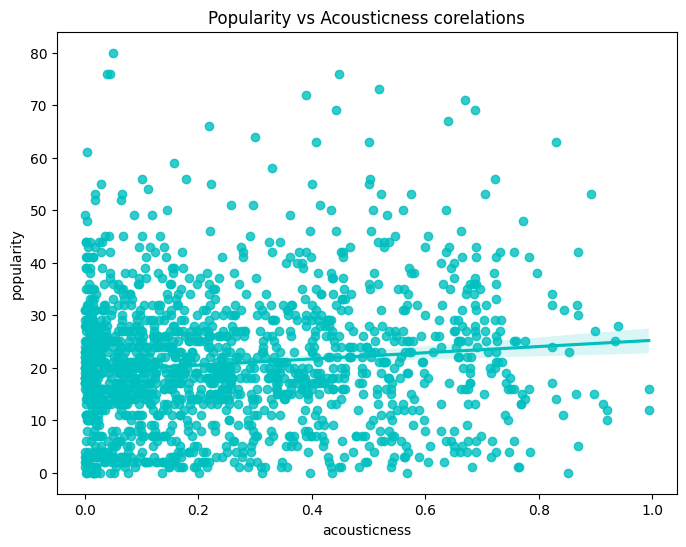

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data = songs, y ="popularity" ,x= "acousticness", color= "c").set(title ="Popularity vs Acousticness corelations")

In [ ]:
#new column year add to the dataset from the realease date
songs['date'] = pd.to_datetime(songs['release_date'])
# Extract the year and add it as a new column to the original DataFrame
df['year'] = df['date'].dt.year

In [ ]:
#check that year column is added or not
songs.head()

,name,album,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration,date,year
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,49,2022-06-10,2022
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253,2022-06-10,2022
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263,2022-06-10,2022
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,306,2022-06-10,2022
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305,2022-06-10,2022


<ipython-input-21-ca7751e211c0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num,bins=30,kde=True)


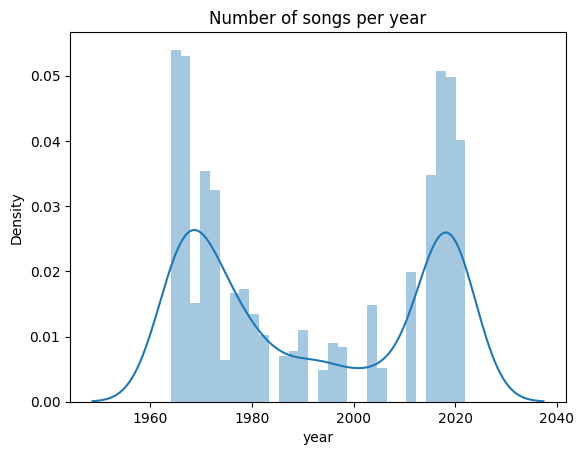

In [ ]:
#from year coloum create a graph of number of song
num=songs['year'].dropna()
sns.distplot(num,bins=30,kde=True)
plt.title("Number of songs per year")
plt.show()



from above graph the number of song in year 1960 to 1980 is high and in 2000 to 2020  is high

<ipython-input-22-54d7ac92a3ed>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': False}` instead.

  fig = sns.barplot(x = songs['year'], y = total_duration, ax= ax, errwidth = False).set(title = "Year vs Durations")


AttributeError: Text.set() got an unexpected keyword argument 'rotations'

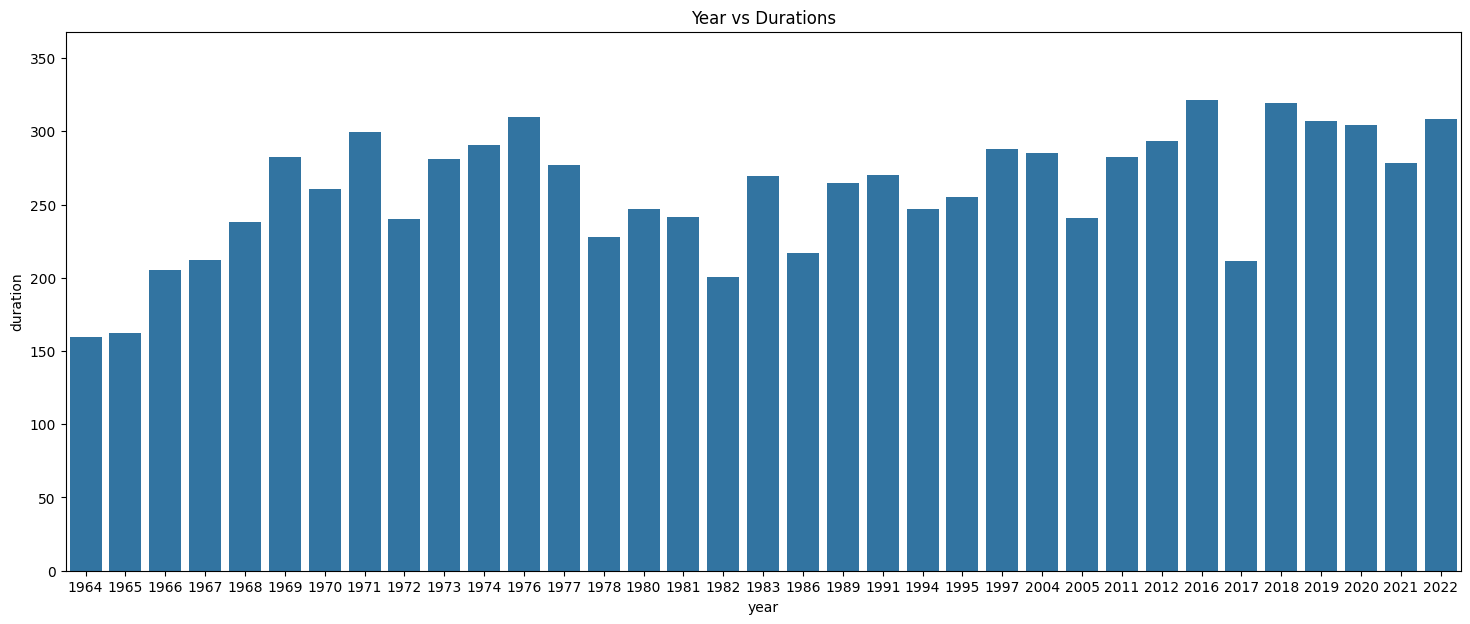

In [ ]:
#with bar plot lets take the year vs duration
total_duration = songs.duration
fig_dims = (18,7)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x = songs['year'], y = total_duration, ax= ax, errwidth = False).set(title = "Year vs Durations")
plt.xticks(rotations=90)

AttributeError: Axes.set() got an unexpected keyword argument 'Title'

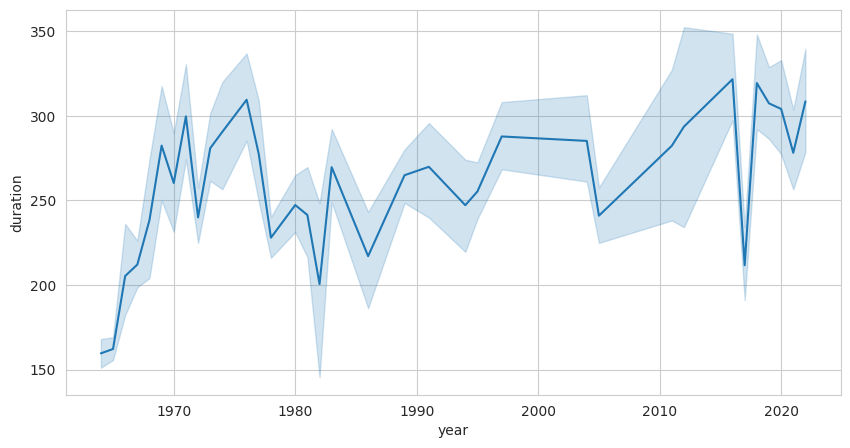

In [ ]:
total_duration = songs.duration
sns.set_style(style="whitegrid")
fig_dims = (10,5)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.lineplot(x = songs['year'], y = total_duration, ax= ax).set(Title ="Year vs Durations")
plt.xticks(rotations=60)

In [ ]:
songs.head()

,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
0,2022-06-10,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,49
1,2022-06-10,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253
2,2022-06-10,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263
3,2022-06-10,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,306
4,2022-06-10,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305


In [ ]:
#from making cohort of songs lets drop some more coloum
columns_to_drop = ['release_date', 'duration']

# Drop the specified columns
songs.drop(columns_to_drop, axis=1, inplace=True)
songs.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33
1,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34
2,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34
3,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32
4,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32


In [ ]:
#use k culster mean aloritham to make the song cohort
x=songs
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

# Fit the KMeans model to the data
kmeans.fit(x)

# Access cluster centers
print(kmeans.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 3.37695130e-01  5.24228261e-01  6.74380435e-01  1.31968600e-01
   2.66754348e-01 -7.54171739e+00  4.42434783e-02  9.17324130e+01
   5.76597826e-01  3.52173913e+01]
 [ 1.85399551e-01  4.21601695e-01  8.74245763e-01  1.77512648e-01
   6.61365678e-01 -6.13544492e+00  9.32834746e-02  1.42875886e+02
   5.42115678e-01  1.35042373e+01]
 [ 2.46164284e-01  3.21831579e-01  7.41231579e-01  1.40551466e-01
   4.15034737e-01 -7.79357895e+00  7.92378947e-02  1.90752695e+02
   5.47578947e-01  1.97684211e+01]
 [ 2.45681815e-01  5.27707965e-01  7.99668142e-01  1.55497847e-01
   4.61511062e-01 -6.53642035e+00  5.80212389e-02  1.13770239e+02
   6.35526549e-01  2.64070796e+01]
 [ 2.65162253e-01  5.29550562e-01  7.55477528e-01  1.46215479e-01
   4.74337640e-01 -8.23624719e+00  6.59016854e-02  1.03168472e+02
   6.01810112e-01  1.02808989e+01]
 [ 2.99034148e-01  5.79262295e-01  7.46918033e-01  9.84430074e-02
   2.16918033e-01 -6.35081967e+00  5.18524590e-02  1.22016721e+02
   6.60867213e-01  5.35081967e+01

We can find 10 Group for cohort of similar song in spotify

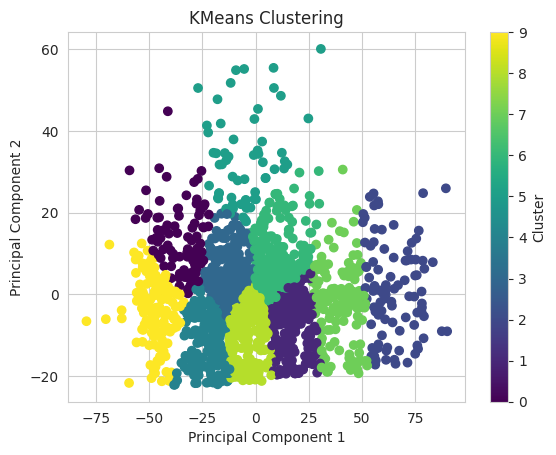

In [ ]:
# Reduce dimensionality to 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(x)

# Create scatter plot of the clusters
plt.scatter(components[:, 0], components[:, 1], c=kmeans.labels_, cmap='viridis')

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()